# Exploring bikeshare dataset year 2019
## by Abdulrahman Osama Ahmed

## Preliminary Wrangling

> I have collected csv files containing the data about the bikeshare system including the trip duration, start and end times, start and end stations info, user type and other properties.

In [28]:
# import all packages and set plots to be embedded inline
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> I have collected the data for year 2019 for two cities: San Francisco and Washington DC.

> Each month's data is in a separate csv file and each city's data is in a separate folder.

> I will read each city's data in a separate dataframe and combine them at last.

> Also the sizes of the files are very large so I will specify the necessary columns to be read and their dtypes to make it faster and easier to read our dataset.

In [29]:
#read San Francisco files into single datatframe
files = glob.glob('FordGoBike/*.csv')
df1 = pd.DataFrame()
for file in files:
    df1 = df1.append(pd.read_csv(file, usecols = ['duration_sec', 'start_time', 'start_station_name', 'end_station_name', 'user_type'], dtype = {'duration_sec': 'Int64', 'start_time': object, 'start_station_name': object, 'end_station_name': object, 'user_type': object}))
df1['city'] = 'San Francisco'
df1.head()

,duration_sec,start_time,start_station_name,end_station_name,user_type,city
0,80825,2019-01-31 17:57:44.6130,Foothill Blvd at 42nd Ave,Grand Ave at Perkins St,Subscriber,San Francisco
1,65900,2019-01-31 20:58:33.8860,Cyril Magnin St at Ellis St,Valencia St at 24th St,Subscriber,San Francisco
2,62633,2019-01-31 18:06:52.9240,Downtown Berkeley BART,65th St at Hollis St,Customer,San Francisco
3,44680,2019-01-31 19:46:09.7190,Church St at Duboce Ave,Grove St at Divisadero,Customer,San Francisco
4,60709,2019-01-31 14:19:01.5410,Steuart St at Market St,The Embarcadero at Bryant St,Customer,San Francisco


In [30]:
#read Washington DC files
files = glob.glob('capitalbikeshare/*.csv')
df2 = pd.DataFrame()
for file in files:
    df2 = df2.append(pd.read_csv(file, usecols = ['Duration', 'Start date', 'Start station', 'End station', 'Member type'], dtype = {'Duration': 'Int64', 'Start date': object, 'Start station': object, 'End station': object, 'Member type': object}))
df2['city'] = 'Washington DC'
df2.head()

,Duration,Start date,Start station,End station,Member type,city
0,230,2019-01-01 00:04:48,14th & Rhode Island Ave NW,Massachusetts Ave & Dupont Circle NW,Member,Washington DC
1,1549,2019-01-01 00:06:37,15th St & Constitution Ave NW,18th St & Wyoming Ave NW,Casual,Washington DC
2,177,2019-01-01 00:08:46,Adams Mill & Columbia Rd NW,Woodley Park Metro / Calvert St & Connecticut ...,Casual,Washington DC
3,228,2019-01-01 00:08:47,8th & O St NW,11th & S St NW,Member,Washington DC
4,1300,2019-01-01 00:12:29,Lynn & 19th St North,Columbia Pike & S Taylor St,Member,Washington DC


In [31]:
df1.info(verbose= True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 150101
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   duration_sec        2506983 non-null  Int64 
 1   start_time          2506983 non-null  object
 2   start_station_name  2426850 non-null  object
 3   end_station_name    2424633 non-null  object
 4   user_type           2506983 non-null  object
 5   city                2506983 non-null  object
dtypes: Int64(1), object(5)
memory usage: 136.3+ MB


In [32]:
# df1 San Francisco renaming columns to unify the names across all dataframes and removing rows with null values
df1.rename(columns = {'duration_sec':'duration', 'start_station_name':'start_station', 'end_station_name':'end_station'}, inplace = True)
df1.dropna(axis = 0, inplace = True)
df1.info(verbose= True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407907 entries, 0 to 149779
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   duration       2407907 non-null  Int64 
 1   start_time     2407907 non-null  object
 2   start_station  2407907 non-null  object
 3   end_station    2407907 non-null  object
 4   user_type      2407907 non-null  object
 5   city           2407907 non-null  object
dtypes: Int64(1), object(5)
memory usage: 130.9+ MB


In [33]:
df2.info(verbose= True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3398417 entries, 0 to 161877
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Duration       3398417 non-null  Int64 
 1   Start date     3398417 non-null  object
 2   Start station  3398417 non-null  object
 3   End station    3398417 non-null  object
 4   Member type    3398417 non-null  object
 5   city           3398417 non-null  object
dtypes: Int64(1), object(5)
memory usage: 184.7+ MB


In [34]:
# df2 Washington DC renaming columns to unify the names across all dataframes
df2.rename(columns = {'Duration':'duration', 'Start date':'start_time', 'End date':'end_time', 'Start station':'start_station', 'End station':'end_station', 'Member type':'user_type'}, inplace = True)
df2.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3398417 entries, 0 to 161877
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   duration       3398417 non-null  Int64 
 1   start_time     3398417 non-null  object
 2   start_station  3398417 non-null  object
 3   end_station    3398417 non-null  object
 4   user_type      3398417 non-null  object
 5   city           3398417 non-null  object
dtypes: Int64(1), object(5)
memory usage: 184.7+ MB


In [35]:
#changing values of user_type column to be same as other dataframes
df2['user_type'] = df2['user_type'].map({'Member':'Subscriber', 'Casual':'Customer'})

In [36]:
df2['user_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [37]:
df = df1.append(df2)
print(df.head())


   duration                start_time                start_station  \
0     80825  2019-01-31 17:57:44.6130    Foothill Blvd at 42nd Ave   
1     65900  2019-01-31 20:58:33.8860  Cyril Magnin St at Ellis St   
2     62633  2019-01-31 18:06:52.9240       Downtown Berkeley BART   
3     44680  2019-01-31 19:46:09.7190      Church St at Duboce Ave   
4     60709  2019-01-31 14:19:01.5410      Steuart St at Market St   

                    end_station   user_type           city  
0       Grand Ave at Perkins St  Subscriber  San Francisco  
1        Valencia St at 24th St  Subscriber  San Francisco  
2          65th St at Hollis St    Customer  San Francisco  
3        Grove St at Divisadero    Customer  San Francisco  
4  The Embarcadero at Bryant St    Customer  San Francisco  


In [38]:
#Converting start_time column to datetime so we can exract information from it
df['start_time'] = pd.to_datetime(df['start_time'])

In [39]:
df['hour'] = df['start_time'].dt.hour
df['day'] = df['start_time'].dt.day_name()
df['month'] = df['start_time'].dt.month_name()
print(df['hour'].unique())
print(df['day'].unique())
print(df['month'].unique())

[17 20 18 19 14 22 23 21 16 11 12 15  9 13  8 10  7  6  5  4  3  2  1  0]
['Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [40]:
df.info(verbose= True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5806324 entries, 0 to 161877
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   duration       5806324 non-null  Int64         
 1   start_time     5806324 non-null  datetime64[ns]
 2   start_station  5806324 non-null  object        
 3   end_station    5806324 non-null  object        
 4   user_type      5806324 non-null  object        
 5   city           5806324 non-null  object        
 6   hour           5806324 non-null  int64         
 7   day            5806324 non-null  object        
 8   month          5806324 non-null  object        
dtypes: Int64(1), datetime64[ns](1), int64(1), object(6)
memory usage: 448.5+ MB


### What is the structure of your dataset?

> I have collected the data for two different cities: San Francisco and Washington DC. The data is about a bikesharing system for year 2019. We have the duration of each trip, the start time, the start and end station names and the type of the user and I have added the name of the city

### What is/are the main feature(s) of interest in your dataset?

> I am interested in investigating the duration of the trips, the hour of the day, day of the week, and month of the year.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will take into consideration the type of user and the city name and see if they affect our main features.

## Univariate Exploration



In [41]:
df.describe()

,duration,hour
count,5.806324e+06,5.806324e+06
mean,9.598256e+02,1.366807e+01
std,2.092287e+03,4.832586e+00
min,6.000000e+01,0.000000e+00
25%,3.780000e+02,9.000000e+00
50%,6.260000e+02,1.400000e+01
75%,1.029000e+03,1.700000e+01
max,8.636500e+04,2.300000e+01


> We see that the average trip duration is around 960 seconds which is about 16 minutes. We aslo see that 75 percent of our observations are below 1030 seconds and the other are very large numbers reaching maximum of 86000 seconds which are a little weired but we don't have more information to take a futher look into that. However, we expect these outliers to make our visualization zoomed out.

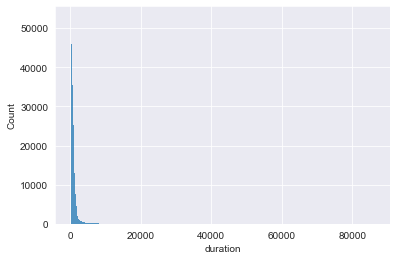

In [42]:
#We will start with a simple histogram of the trips duration to see its distribution 
sns.set_style('darkgrid')
sns.histplot(data = df, x = 'duration');

> As expected, it is zoomed out. it looks like most of the trips are within the duration of range from above zero to around 3000 seconds. I will remove the outliers from our graph to see a deatiled picture of our distribution.

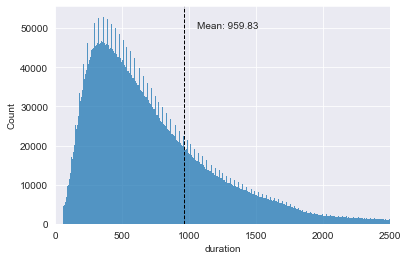

In [43]:
#Drawing another histogram of the duration with limit to 2500 seconds
sns.histplot(data = df, x = 'duration');
plt.xlim([0, 2500]);
plt.axvline(df['duration'].mean(), color='k', linestyle='dashed', linewidth=1);
min_ylim, max_ylim = plt.ylim()
plt.text(df['duration'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['duration'].mean()));

> It is more clear now that the distribution of the trips duration is right skewed with the peak around 400 seconds. Let's investigate the next feature.

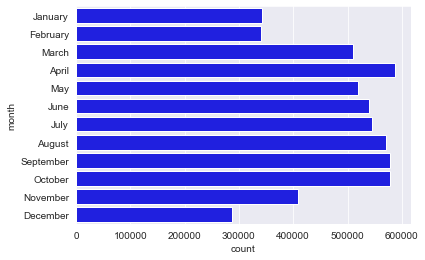

In [44]:
#Exploring months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data = df, y = 'month', order = months, color = 'blue');

> Months of winter have fewer trips than other months which is logical as people will prefer to take a ride during days with good weather. We have April with most trips then September and October. But we will investigate into that later and see if it differ for different types of user and different cities.

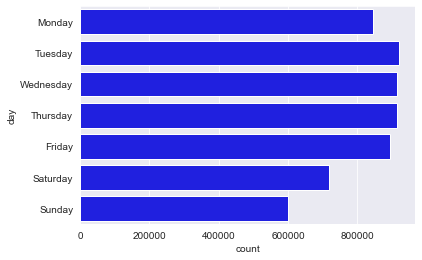

In [45]:
#Exploring days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data = df, y = 'day', order = days, color = 'blue');

> I see that weekdays have more trips than weekends. This might be due to people are using bikes to go to/from work. We will investigate in this further when we look at hour of the day.

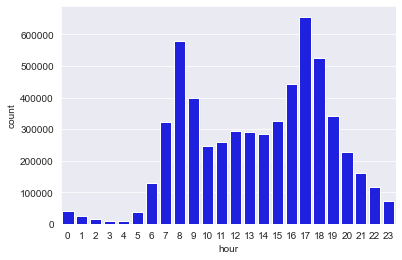

In [46]:
#Exploring hours of the day
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
sns.countplot(data = df, x = 'hour', order = hours, color = 'blue');

> We have two peaks, one at 8:00 AM and the other at 17:00. This is suggesting the previous idea. We will look more deep into that later.

> Let's have a look at how many of the trips were made by subscribers vs those were made by customers.

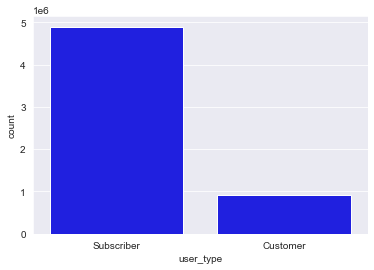

In [47]:
#bar chart no of trips made by subscribers vs customers
sns.countplot(data = df, x = 'user_type', color = 'blue');

> We have number trips made by subscribers is 5 times the number of trips made by customers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trips duration distribution was right skewed which means less trips take long time. This is not unusual as people are not expected to be taking rides for a very long trips. Also there were unusual observations having duration reaching 86000 seconds. But we have not enough information to dig into that.

> Months of winter December, January and February have the least number of trips compared to the other months of the year. This is also not unusual as people are not expected to take too many rides during cold weather or rainy days. April was the most common month of the year.

> Weekdays had more trips than weekends with Tuesday as the most common day of the week.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The hour of the day distribution was logical from the side of after midnight to have very low number of trips. On the other hand, it had two peaks in the morning at 8:00 and the other at 5:00 PM. These peaks need to be investigated furhter.

## Bivariate Exploration



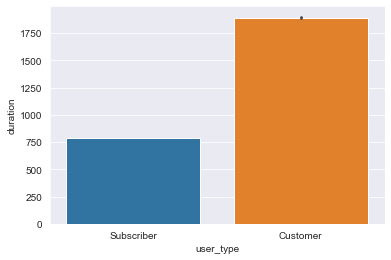

In [48]:
#average trip duration for different user types
sns.barplot(data = df, x = 'user_type', y = 'duration');

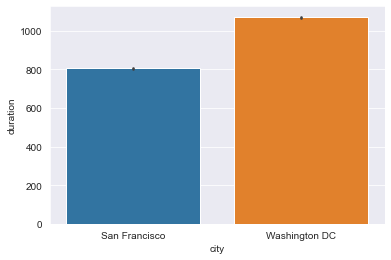

In [49]:
#average trip duration for different cities
sns.barplot(data = df, x = 'city', y = 'duration');

> We can find that the average duration of trips made by customers is more than half an hour which is much more than that of trips made by subscribers which is less than 15 minutes.

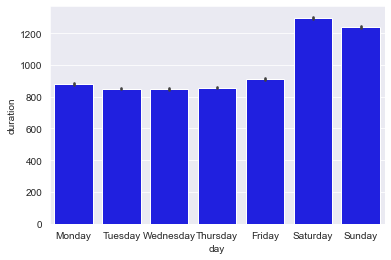

In [50]:
#creating barplot for average duration in seconds for each day of the week
sns.barplot(data = df, x = 'day', y = 'duration', order = days, color = 'blue');

> The average duration of trips over weekends is greater than that of trips on week days.

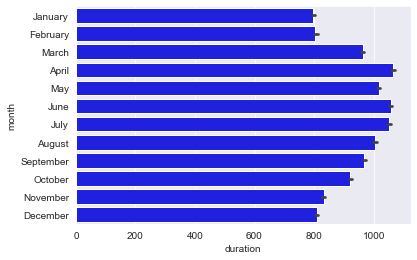

In [51]:
#creating barplot for average duration in seconds for each month of the year
sns.barplot(data = df, y = 'month', x = 'duration', order = months, color = 'blue');

> April being the most common month has also the biggest average of duration. On the other side, winter months being the least common have also the least average of trip duration.

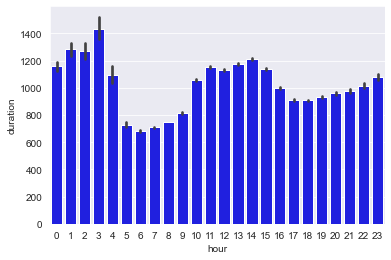

In [52]:
#creating barplot for the average duration of trips vs the hour of the day
sns.barplot(data = df, x = 'hour', y = 'duration', order = hours, color = 'blue');

> hours after midnight have high average of duration more than the rest the day.

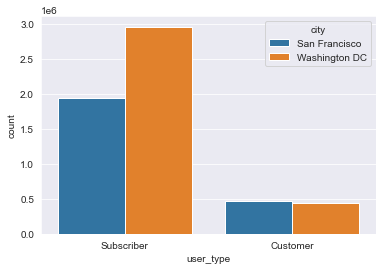

In [53]:
#Comparing the number of trips made by subscribers and customers over the two cities
sns.countplot(data = df, x = 'user_type', hue = 'city');

> The number of trips made by subscribers in Washington DC is more than that in San Francisco where the two cities are nearly equal for the number of trips made by customers

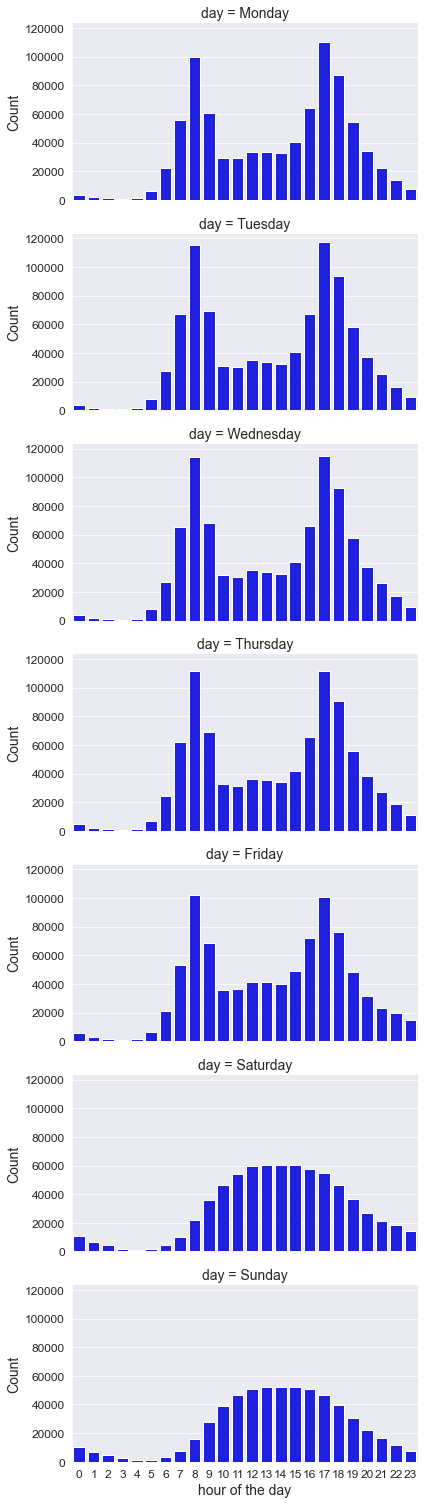

In [54]:
#creating a facetgrid of the number of trips for each hour of the day for each day of the week
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)
g = sns.FacetGrid(df, row='day',  row_order = days, height=3, aspect=2)
g.map_dataframe(sns.countplot, x='hour', color='blue', order = hours)
g.set_titles(col_template='{col_name}')
g.set_axis_labels('hour of the day', "Count")

plt.tight_layout()

> The same two peaks at 8:00 AM and 5:00 PM were repeated on all week days. While the weekends have the trips normally distributed since morning till midnight and few trips after midnight.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We noticed that subscribers have less average of trip duration than customers which might mean that subscribers are using the service to take short rides on regular basis, while customers are using the service to take long rides.

> Months of winter have the least average of trip duration while April and months of summer have trips with much more average of duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Week days and weekends affects the which hours are more common. During week days we have two peaks at 8:00 and 17:00 while during weekends we have increasing number of trips from 8:00 in the morning reaching its peak between 13:00 and 14:00 afternoon.

## Multivariate Exploration



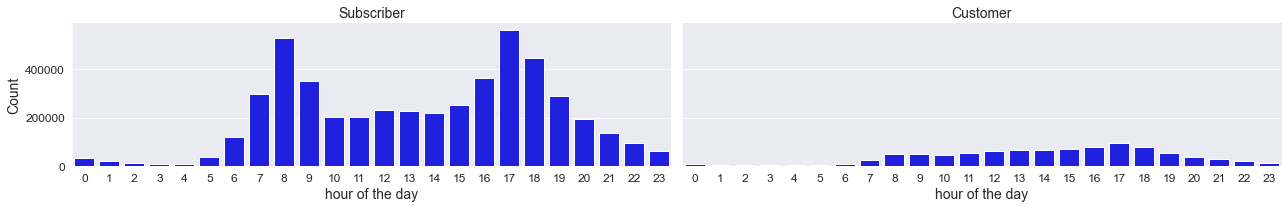

In [55]:
#Comparing number of trips vs hour of the day for each type of user
g = sns.FacetGrid(df, col = 'user_type', height=3, aspect=3)
g.map_dataframe(sns.countplot, x ='hour', color='blue', order = hours)
g.set_titles(col_template='{col_name}')
g.set_axis_labels('hour of the day', "Count")
plt.tight_layout()

> The comparison is not very clear. Let's go more deep into details and see the same comparison but for each day of the week separate.

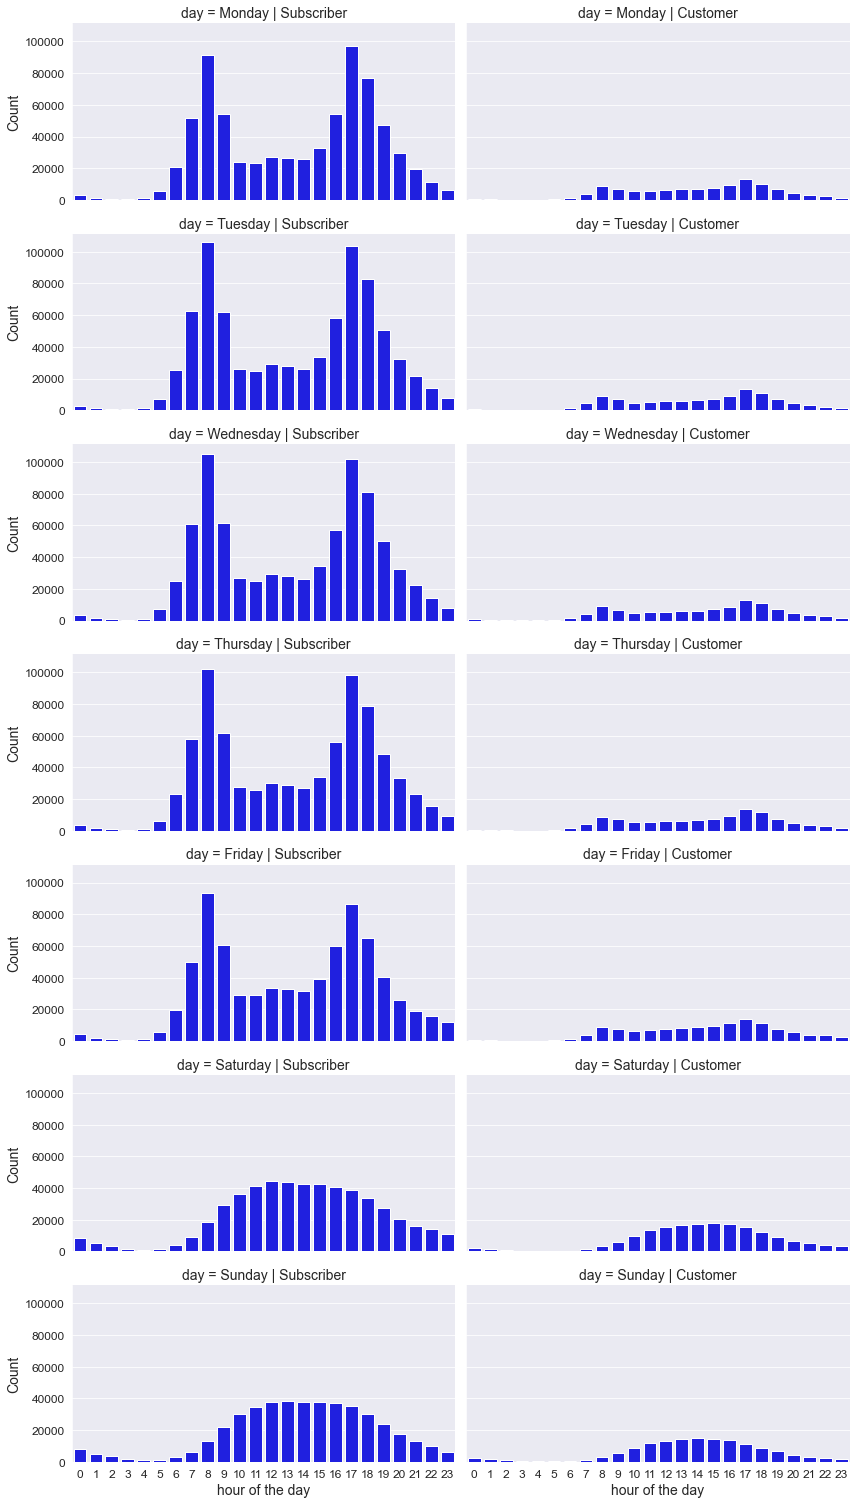

In [56]:
#number of trips over each hour of the day for every day of the week and type of user
g = sns.FacetGrid(df, col = 'user_type', row='day',  row_order = days, height=3, aspect=2)
g.map_dataframe(sns.countplot, x='hour', color='blue', order = hours)
g.set_titles(col_template='{col_name}')
g.set_axis_labels('hour of the day', "Count")

plt.tight_layout()

> Both subscribers and customrs have nearly the same distribution with peaks at 8:00 and 17:00 during week days and normal distribution over the day during week ends.

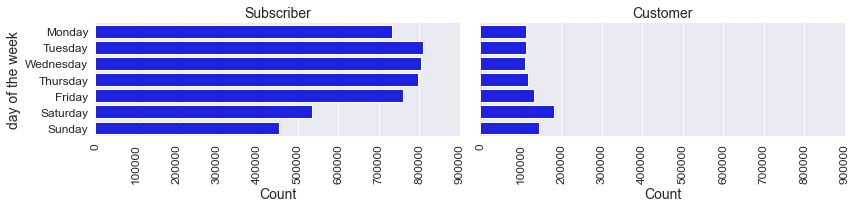

In [57]:
#number of trips vs day of the week by each type of customer
g = sns.FacetGrid(df, col = 'user_type', height=3, aspect=2)
g.map_dataframe(sns.countplot, y='day', color='blue', order = days)
g.set_titles(col_template='{col_name}')
g.set_axis_labels("Count", 'day of the week')
g.set_xticklabels(rotation = 90)
plt.tight_layout()

> For subscribers, week days are more common than week ends, while for customers weekends are more common than the rest of the week.

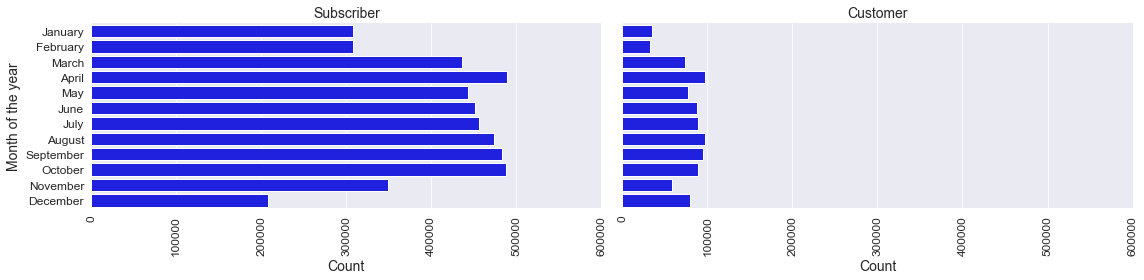

In [58]:
#number of trips in each month of the year for each user type
g = sns.FacetGrid(df, col = 'user_type', height=4, aspect=2)
g.map_dataframe(sns.countplot, y ='month', color='blue', order = months)
g.set_titles(col_template='{col_name}')
g.set_axis_labels("Count", "Month of the year")
g.set_xticklabels(rotation = 90)
plt.tight_layout()

> Both types of users have nearly the same distribution over months with winter having the least number of trips and April as the most common month.

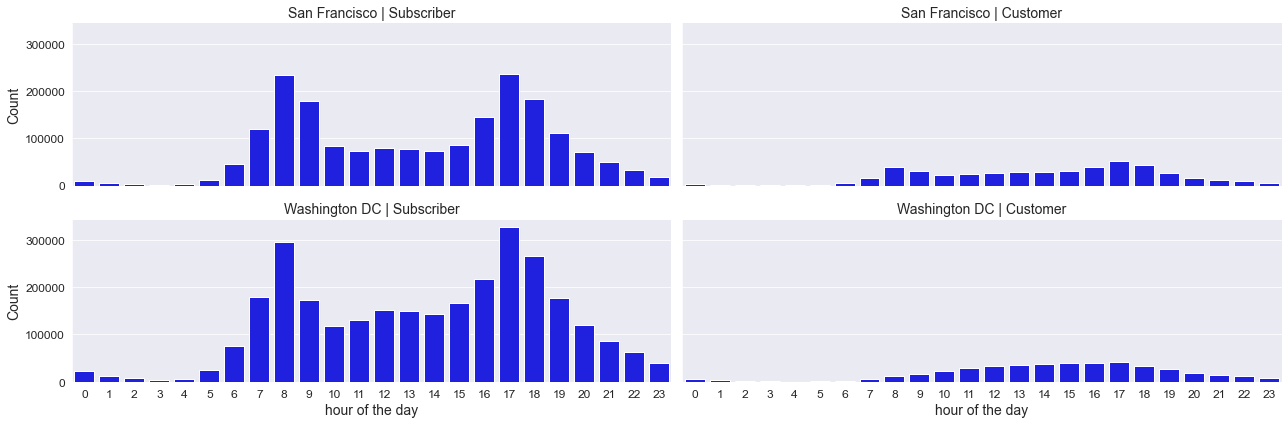

In [59]:
#number of trips vs hour of the day for each user type and each city
g = sns.FacetGrid(df, col = 'user_type', row = 'city', height=3, aspect=3)
g.map_dataframe(sns.countplot, x ='hour', color='blue', order = hours)
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set_axis_labels('hour of the day', "Count")
plt.tight_layout()

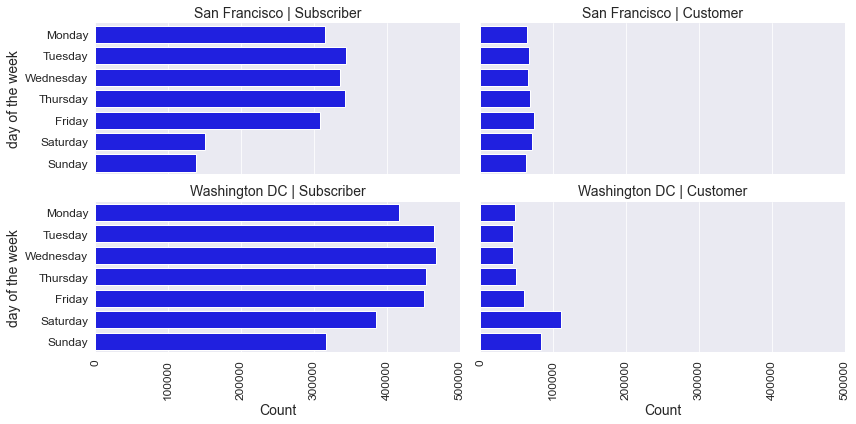

In [60]:
#number of trips vs day of the week by user type and city
g = sns.FacetGrid(df, col = 'user_type', row = 'city', height=3, aspect=2)
g.map_dataframe(sns.countplot, y='day', color='blue', order = days)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_axis_labels("Count", 'day of the week')
g.set_xticklabels(rotation = 90)

plt.tight_layout()

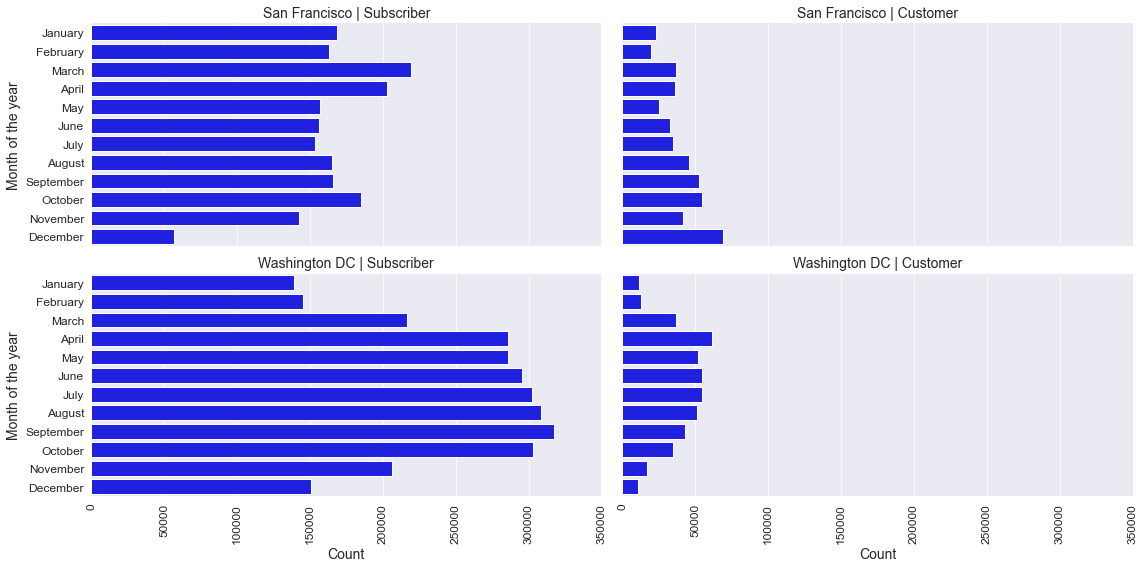

In [61]:
#number of trips vs month of the year by user type and city
g = sns.FacetGrid(df, col = 'user_type', row = 'city', height=4, aspect=2)
g.map_dataframe(sns.countplot, y ='month', color='blue', order = months)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_axis_labels("Count", "Month of the year")
g.set_xticklabels(rotation = 90)
plt.tight_layout()

> Adding the factor of city made the results not so much different except for the distribution of months. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Both types of users had the same distributions regarding the most common hour of the day. Regarding the day of the week, customers seems to be taking rides more on weekends while subscribers are taking more rides on week days.

> For the most common month of the year, in San Francisco March was the most common month for subscribers while surprisingly December was the most common month for customers. In Washington DC September was the most common month for subscribers while April was the most common month for customers.

### Were there any interesting or surprising interactions between features?

> Looking deep into each day separately made a more detailed and clear picture that both types of users are using the service mostly in the same manner. 

> Surprisingly, subscribers were taking shorter rides while customers take longer rides.